In [6]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.array([
    [12,   0],
    [14.5, 1],
    [10,   2],
    [18,   0],
    [8.5,  4],
    [15,   1],
    [22,   0],
    [11,   5],
    [13,   2],
    [20.5, 1],
    [24,   2],
    [16,   3],
    [12.5, 0],
    [28,   0],
    [9,    6],
    [25,   1],
    [14,   4],
    [19,   2],
    [10.5, 2],
    [26.5, 2],
    [15.5, 5],
    [17,   3]
])

Y = np.array([
    0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
    1, 1, 1, 1, 1, 1, 0, 1, 1, 1
])

m = len(Y)

In [7]:

mu = np.mean(X_data, axis=0)
sigma = np.std(X_data, axis=0)
X_norm = (X_data - mu) / sigma  #normalized x so that GD algorithm converges faster
X_train = np.hstack((np.ones((m, 1)), X_norm))
theta = np.zeros(X_train.shape[1])

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(X, Y, theta):
    h = sigmoid(X.dot(theta))
    J = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    return J

In [9]:
def gradient_descent(X, Y, theta, alpha, epoch):
    loss_calculated = []

    for i in range(epoch):
        h = sigmoid(X.dot(theta))
        error = h - Y
        gradient = (1/m) * X.T.dot(error)
        theta = theta - alpha* gradient

        loss_calculated.append(loss(X, Y, theta))

    return theta, loss_calculated

In [10]:
alpha= 0.01
epoch = 10000

print("Value of Loss over iterations")
final_theta, loss = gradient_descent(X_train, Y, theta, alpha,epoch)
print(f"Final weights (theta): {final_theta}")

Value of Loss over iterations
Final weights (theta): [0.75168356 1.32804039 0.62160202]


In [11]:

runner_sample = np.array([25.0, 1.0])

# normalize using the same training statistics
runner_scaled = (runner_sample - mu) / sigma
runner_input = np.concatenate(([1], runner_scaled))

z_value = np.dot(runner_input, final_theta)
prob = sigmoid(z_value)

survival_class = 1 if prob >= 0.5 else 0

print("\nPrediction:")
print(f"Survival Probability : {prob:.4f}")
print(f"Predicted Outcome    : {survival_class}")



Prediction:
Survival Probability : 0.9148
Predicted Outcome    : 1



2) Visualizing the Cost (Loss) dropping


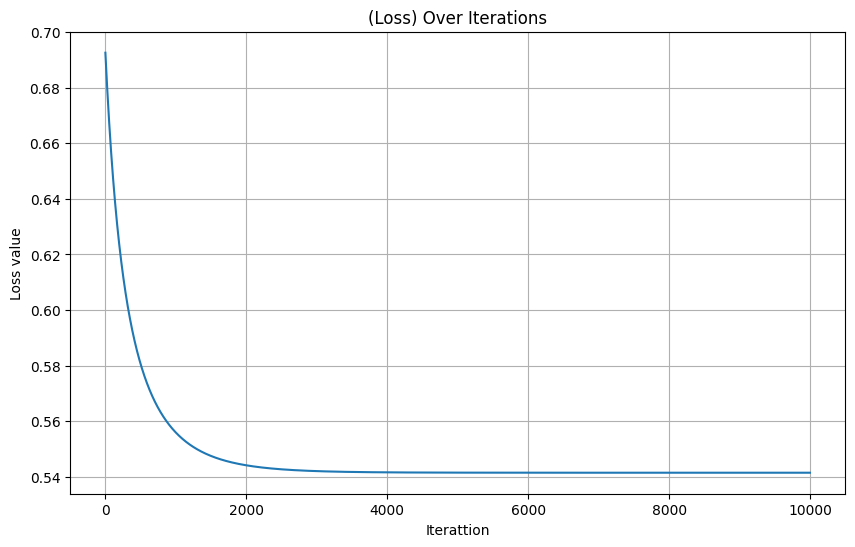

In [12]:
print("\n2) Visualizing the Cost (Loss) dropping")
plt.figure(figsize=(10, 6))
plt.plot(loss)
plt.title('(Loss) Over Iterations')
plt.xlabel('Iterattion')
plt.ylabel('Loss value')
plt.grid(True)
plt.show()

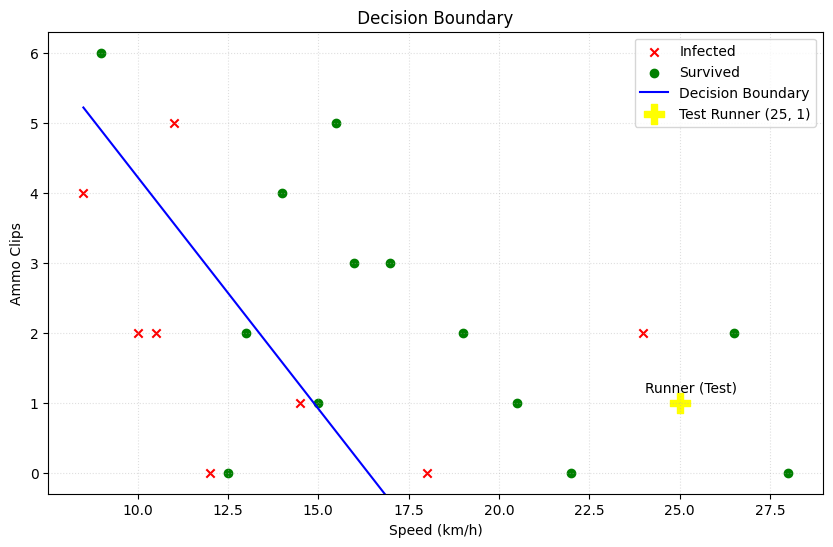

In [13]:



b0, b1, b2 = final_theta


x1_min = X_norm[:, 0].min()
x1_max = X_norm[:, 0].max()
x1_line = np.linspace(x1_min, x1_max, 100)


x2_line = -(b0 + b1 * x1_line) / b2


x1 = x1_line * sigma[0] + mu[0]
x2 = x2_line * sigma[1] + mu[1]

plt.figure(figsize=(10, 6))

plt.scatter(X_data[Y == 0, 0], X_data[Y == 0, 1],
            marker='x', color='red', label='Infected')
plt.scatter(X_data[Y == 1, 0], X_data[Y == 1, 1],
            marker='o', color='green', label='Survived')


plt.plot(x1, x2, color='blue', linestyle='-',label='Decision Boundary')

plt.scatter(runner_sample[0], runner_sample[1],
            marker='P', color='yellow', s=200, label='Test Runner (25, 1)')
plt.annotate(
    'Runner (Test)',
    xy=(runner_sample[0], runner_sample[1]),
    xytext=(8, 8),
    textcoords='offset points',
    ha='center'
)


plt.title(' Decision Boundary ')
plt.xlabel('Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.4)
limits = [X_data[:, 1].min() - 0.3, X_data[:, 1].max() + 0.3]
plt.ylim(limits)

plt.show()

